In [1]:
import io
import glob

import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# Bring in the utilities module
import sys
sys.path.insert(0, '../util')

# allow hot changes in util.py
import importlib
import util
importlib.reload(util)

from util import fit_Tc, replica_average, read_res

## Convergence analysis: plot `nmnm` distributions

In [3]:
def load_nmnm(fname):
    nmnm = np.loadtxt(fname)
    mask = nmnm[:, 1] > 0
    return nmnm[mask]

def overlay_gaussian(nm):
    """Cook up a gaussian shaped curve with sample 1st and 2nd moments.
    """
    x, y = nm.T
    m1 = (x * y).sum()
    m2 = ((x - m1)**2 * y).sum() 
    
    arr = np.exp(-(x - m1)**2 / 2 / m2)
    arr /= arr.sum()
    return arr 

def plot_nmnm(fnames, fname_unif):
    fig, axx = plt.subplots(len(fnames)//3+1, 3, figsize=(9, 15))

    for fname, ax in zip(fnames, axx.ravel()):
        nm = load_nmnm(fname)

        ax.plot(nm[:, 0], nm[:, 1], 'o')
        ax.plot(nm[:, 0], overlay_gaussian(nm), '-', lw=3)
        ax.set_title( fname.split("/nmnm_")[-1].split(".dat")[0])
        ax.grid(True)
        
        nm_unif = load_nmnm(fname_unif)
        ax.plot(nm_unif[:, 0], nm_unif[:, 1], '--', color='C4')
        
    plt.tight_layout()

## Collect MC data / compute the replica statistics

In [4]:
def resample_g_im(L, beta, reslines, show=False):
    """Read a set of result_XXX files and replica average g_im.
    
    reslines is the list of result_XXX files to process.
    """
    resdict = {"L": L, "beta": beta}
    
    df = read_res(reslines)
    print(reslines)
    
    from IPython.display import display
    display(df)
    
    samples = replica_average(df["g_im"], df["err_g_im"])

    m, s = samples.mean(), samples.std()
    resdict["g_im"] = m
    resdict["err_g_im"] = s
    print(m, '+/-', s)

    if show:
        plt.hist(samples, density=True, bins=100, histtype='step')
        plt.axvline(m, lw=5, color='C1')
        plt.axvspan(m-s, m+s, alpha=0.4, color='C1')
        plt.title(str(m) + "+/-" + str(s))
    return resdict

# Analyze $L=6$

### Analyze $L=6$, $\beta=4.0$

['../runs/amp_1.0/L6/res_L6b4.0r10a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r1a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r5a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r6a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r9a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r4a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r7a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r2a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r3a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.0r8a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0          10  0.320615     0.001184            T  0.138806  0.003834   
1           1  0.210957     0.000997            F  0.088081  0.001260   
2           5  0.157048     0.000428            T  0.054902  0.000269   
3           6  0.327103     0.001804            T  0.127548  0.003220   
4           9  0.118028     0.000249            T  0.034802  0.000103   
5           4  0.430984     0.002565            T  0.179372  0.009306   
6           7  0.124449     0.000262            T  0.037988  0.000121   
7           2  0.176487     0.000513            T  0.065574  0.000415   
8           3  0.205813     0.000538            T  0.087056  0.000858   
9           8  0.377389     0.002492            T  0.167428  0.004787   

  conv_g_im       Z(mln)  
0         T    41.286849  
1         F   166.095637  
2         T   543.825416  
3         T    44.306183  
4         T  1497.315443  
5         T    14.154085  
6         T  1263.865672  
7         T   286.897559  
8         T   185.065451  
9         T    19.822210

0.09815471822177864 +/- 0.0011732032330905877


<IPython.core.display.Javascript object>


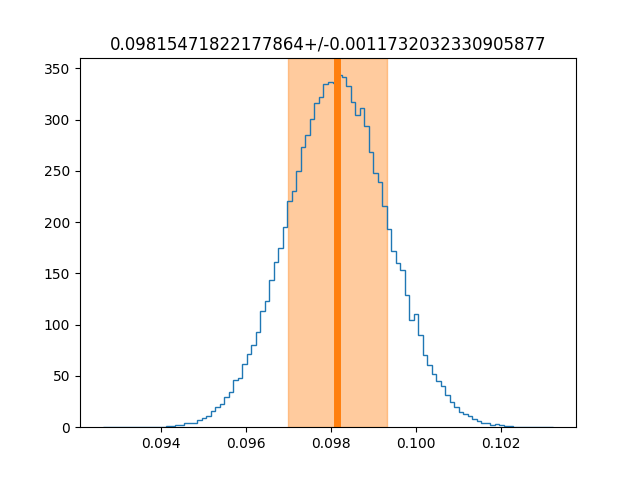

In [8]:
L, beta = 6, 4.0
dct_L6b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


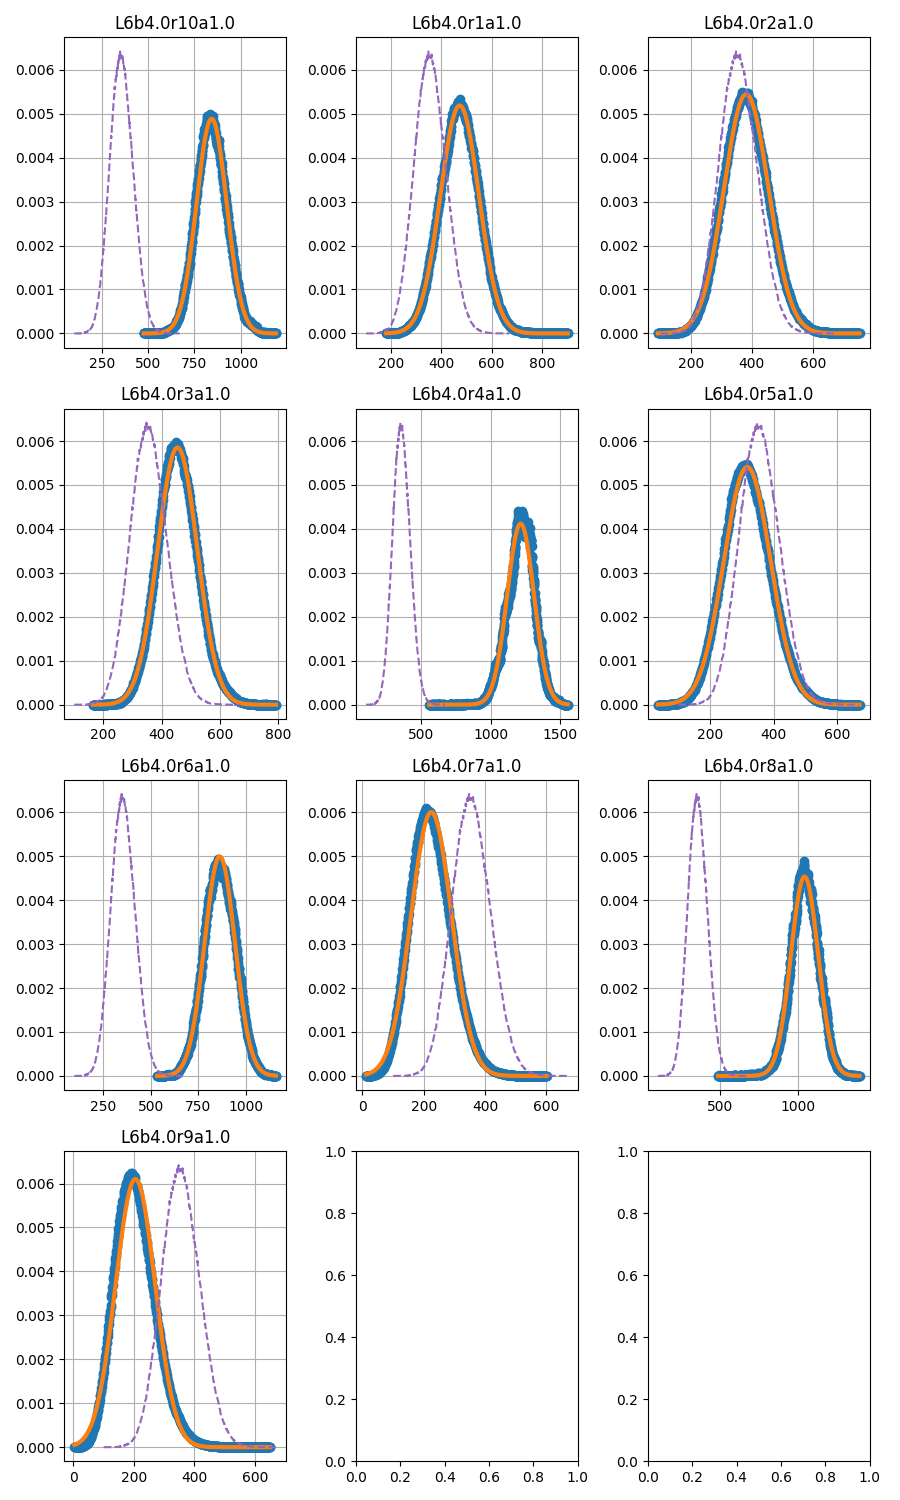

In [32]:
fnames = !ls ../runs/amp_1.0/L6/nmnm_L6b4.0*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

In [30]:
!ls ../runs/amp_1.0/L6/nmnm_L6b4.0*

../runs/amp_1.0/L6/nmnm_L6b4.0r10a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r1a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r2a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r3a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r4a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r5a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r6a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r7a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r8a1.0.dat
../runs/amp_1.0/L6/nmnm_L6b4.0r9a1.0.dat


### Analyze $L=6$, $\beta=4.5$

['../runs/amp_1.0/L6/res_L6b4.5r10a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r6a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r3a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r9a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r5a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r7a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r4a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r8a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r1a1.0.dat', '../runs/amp_1.0/L6/res_L6b4.5r2a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0          10  0.320931     0.001672            T  0.201493  0.009214   
1           6  0.333058     0.002334            T  0.195514  0.009090   
2           3  0.202057     0.000449            T  0.128337  0.001105   
3           9  0.105533     0.000143            T  0.039949  0.000094   
4           5  0.142772     0.000328            T  0.069106  0.000357   
5           7  0.112055     0.000150            T  0.044565  0.000146   
6           4  0.433765     0.003754            T  0.241215  0.014562   
7           8  0.382995     0.001826            T  0.236687  0.005759   
8           1  0.203009     0.000563            T  0.125329  0.001386   
9           2  0.167881     0.000394            T  0.092883  0.000722   

  conv_g_im       Z(mln)  
0         T    15.328904  
1         T    15.491962  
2         T   120.090952  
3         T  1874.007104  
4         T   472.830801  
5         T  1229.609450  
6         T     6.261033  
7         T    19.277005  
8         T   116.658325  
9         T   226.659524

0.137508304381437 +/- 0.0020379921173189893


<IPython.core.display.Javascript object>


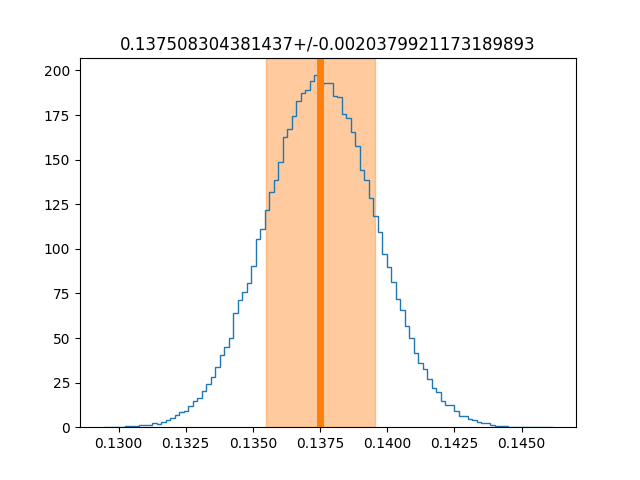

In [9]:
L, beta = 6, 4.5
dct_L6b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


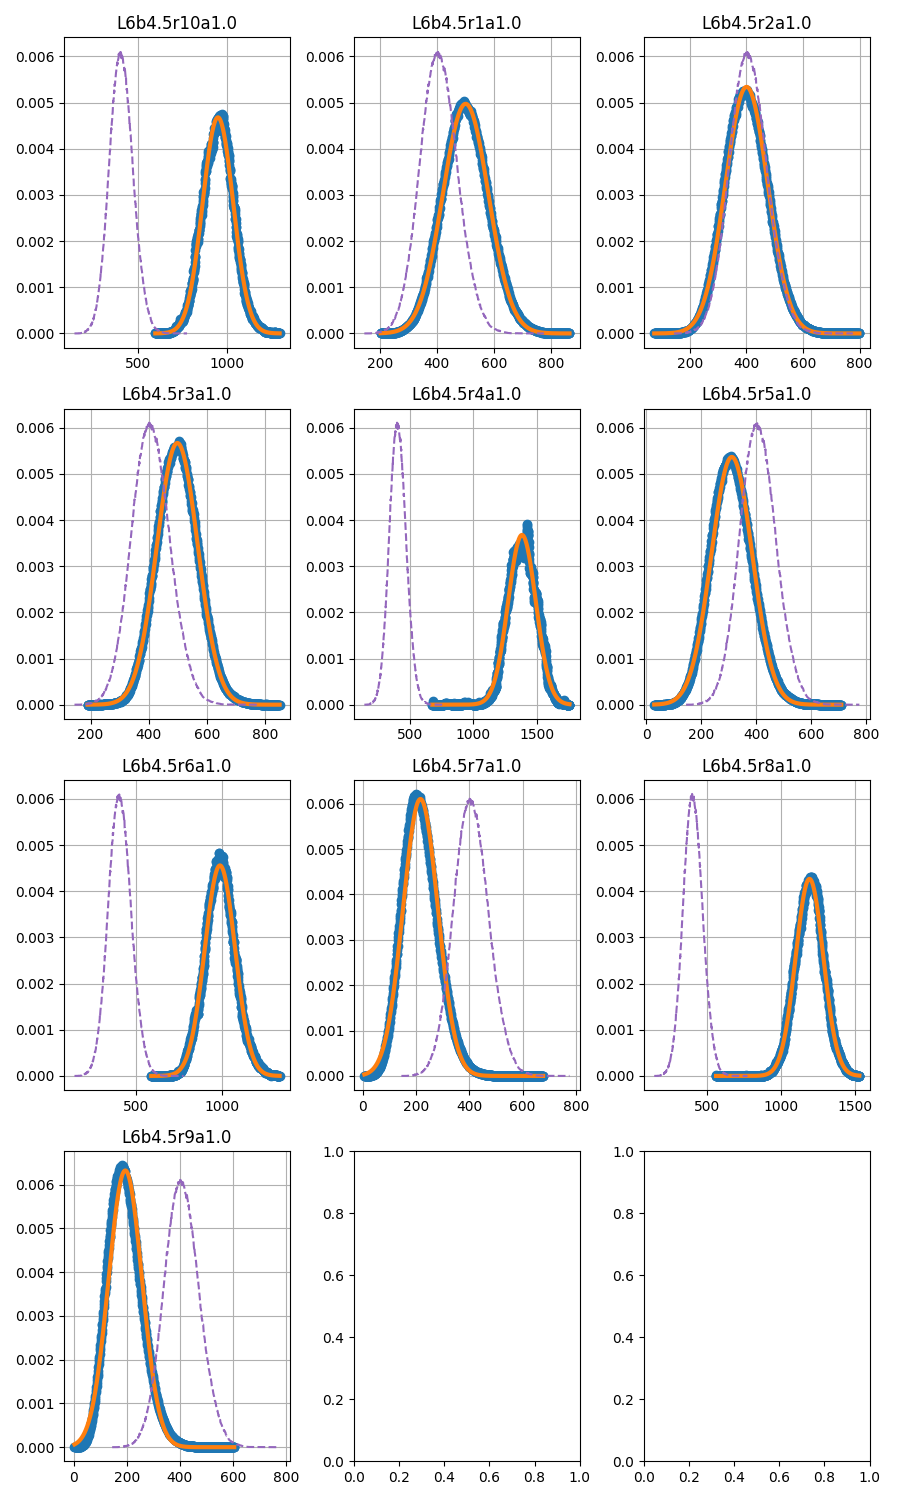

In [33]:
fnames = !ls ../runs/amp_1.0/L6/nmnm_L6b4.5*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=6$, $\beta=5.0$

['../runs/amp_1.0/L6/res_L6b5.0r6a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r2a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r8a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r4a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r1a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r10a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r5a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r9a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r3a1.0.dat', '../runs/amp_1.0/L6/res_L6b5.0r7a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           6  0.336136     0.001710            T  0.240679  0.007891   
1           2  0.162643     0.000375            T  0.119261  0.001082   
2           8  0.385758     0.001942            T  0.285524  0.009068   
3           4  0.447233     0.002872            T  0.293059  0.015054   
4           1  0.197124     0.000940            F  0.156118  0.001917   
5          10  0.317353     0.001707            T  0.249997  0.007850   
6           5  0.134042     0.000292            T  0.083387  0.000495   
7           9  0.098150     0.000113            T  0.045377  0.000143   
8           3  0.201767     0.000471            T  0.163399  0.001781   
9           7  0.104550     0.000251            F  0.051794  0.000255   

  conv_g_im       Z(mln)  
0         T     8.725836  
1         T    99.522225  
2         T     7.406480  
3         T     4.715793  
4         F    52.091424  
5         T     8.446648  
6         T   265.593275  
7         T  1012.398169  
8         T    49.916338  
9         T   824.177748

0.16885474402375403 +/- 0.0021053360140866235


<IPython.core.display.Javascript object>


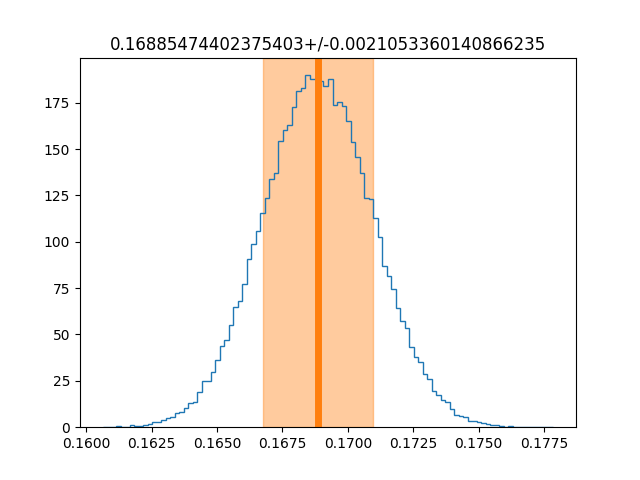

In [10]:
L, beta = 6, 5.0
dct_L6b50 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


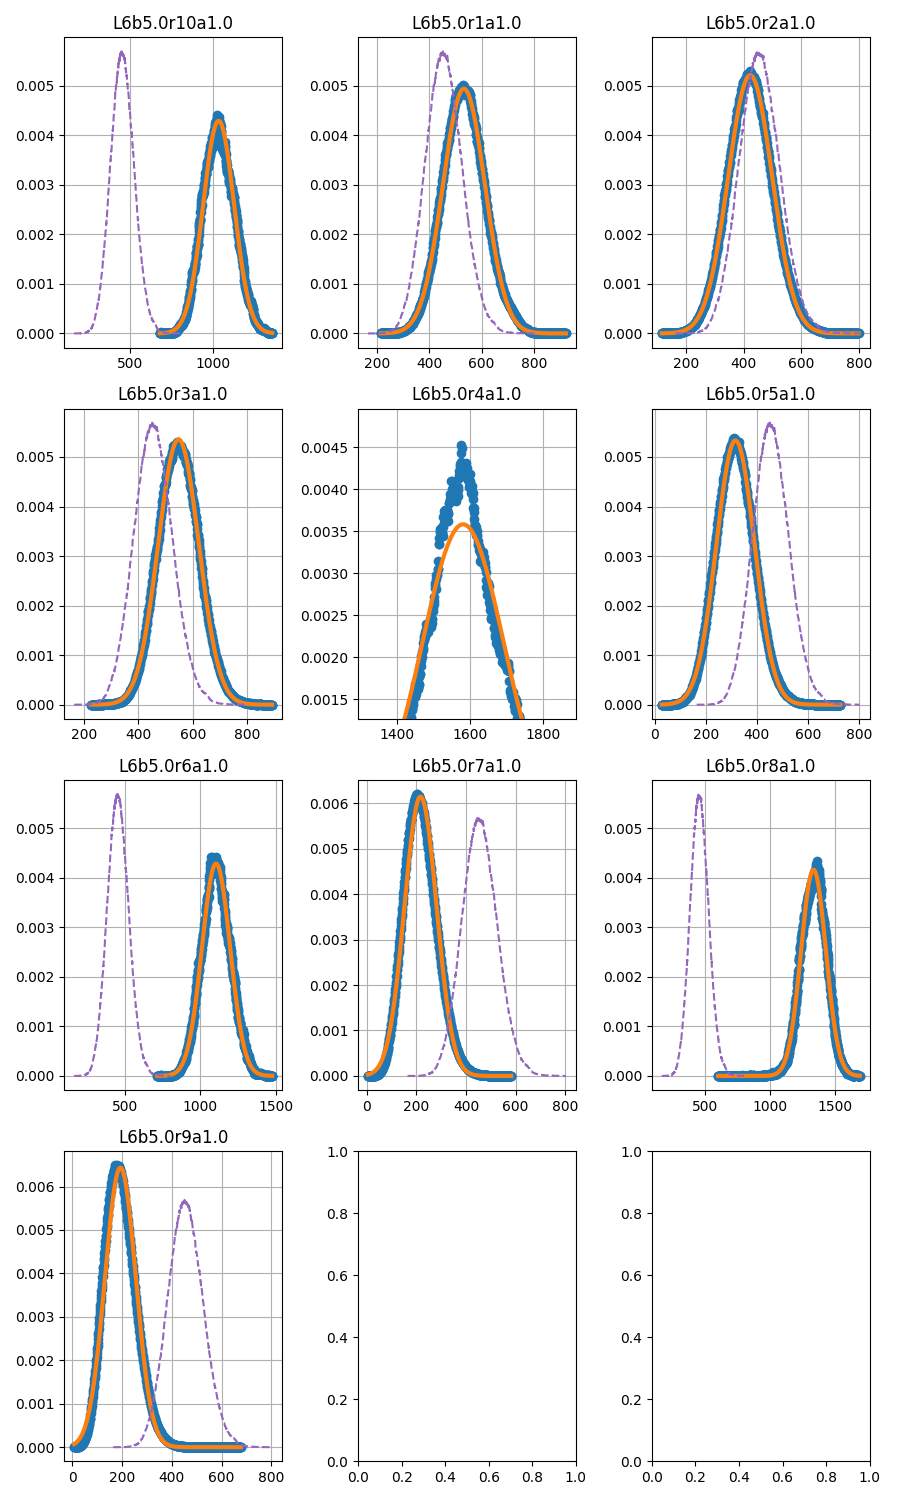

In [34]:
fnames = !ls ../runs/amp_1.0/L6/nmnm_L6b5.0*
fname_unif = '../repro_runs/m5.2L6/nmnm_m5.2L6b5.0_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=6 $

In [11]:
df = pd.DataFrame([dct_L6b40, dct_L6b45, dct_L6b50])
df

# SAVE L=6
df.to_csv("m5.2amp1.0L6_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,6,4.0,0.09815471822177864,0.0011732032330905877
1,6,4.5,0.137508304381437,0.0020379921173189893
2,6,5.0,0.16885474402375403,0.0021053360140866235



## Read in $L=6$ 

In [12]:
df_L6 = pd.read_csv("m5.2amp1.0L6_av_replicas.dat")
df_L6

Unnamed: 0  L  beta      g_im  err_g_im
0           0  6   4.0  0.098155  0.001173
1           1  6   4.5  0.137508  0.002038
2           2  6   5.0  0.168855  0.002105

# Analyze $L=8$

### Analyze $L=8$, $\beta=4.0$

['../runs/amp_1.0/L8/res_L8b4.0r3a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r10a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r7a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r9a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r5a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r2a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r8a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r6a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r1a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.0r4a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           3  0.257528     0.002198            T  0.067692  0.002939   
1          10  0.328262     0.006329            T  0.079745  0.019421   
2           7  0.225804     0.010105            T  0.046482  0.002333   
3           9  0.154445     0.004845            T  0.028208  0.001190   
4           5  0.186765     0.004433            T  0.039652  0.001464   
5           2  0.253008     0.002680            T  0.070650  0.002659   
6           8  0.313031     0.002835            T  0.063448  0.006158   
7           6  0.365439     0.002810            T  0.090495  0.010874   
8           1  0.279166     0.006166            F  0.072959  0.006257   
9           4  0.353436     0.006018            T  0.088199  0.012867   

  conv_g_im     Z(mln)  
0         T  29.286082  
1         F   4.587352  
2         T  15.040244  
3         T  58.638700  
4         T  30.509776  
5         T  36.418598  
6         T   6.436352  
7         T   3.882893  
8         F  11.676544  
9         T   4.303709

0.06474847655892586 +/- 0.0027573846655268145


<IPython.core.display.Javascript object>


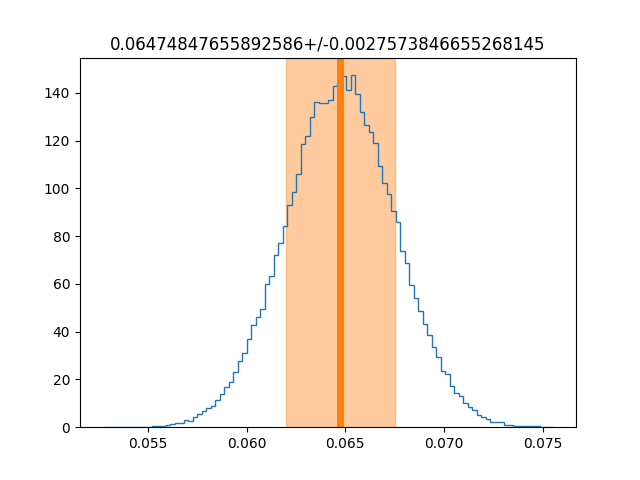

In [13]:
L, beta = 8, 4.0
dct_L8b40 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


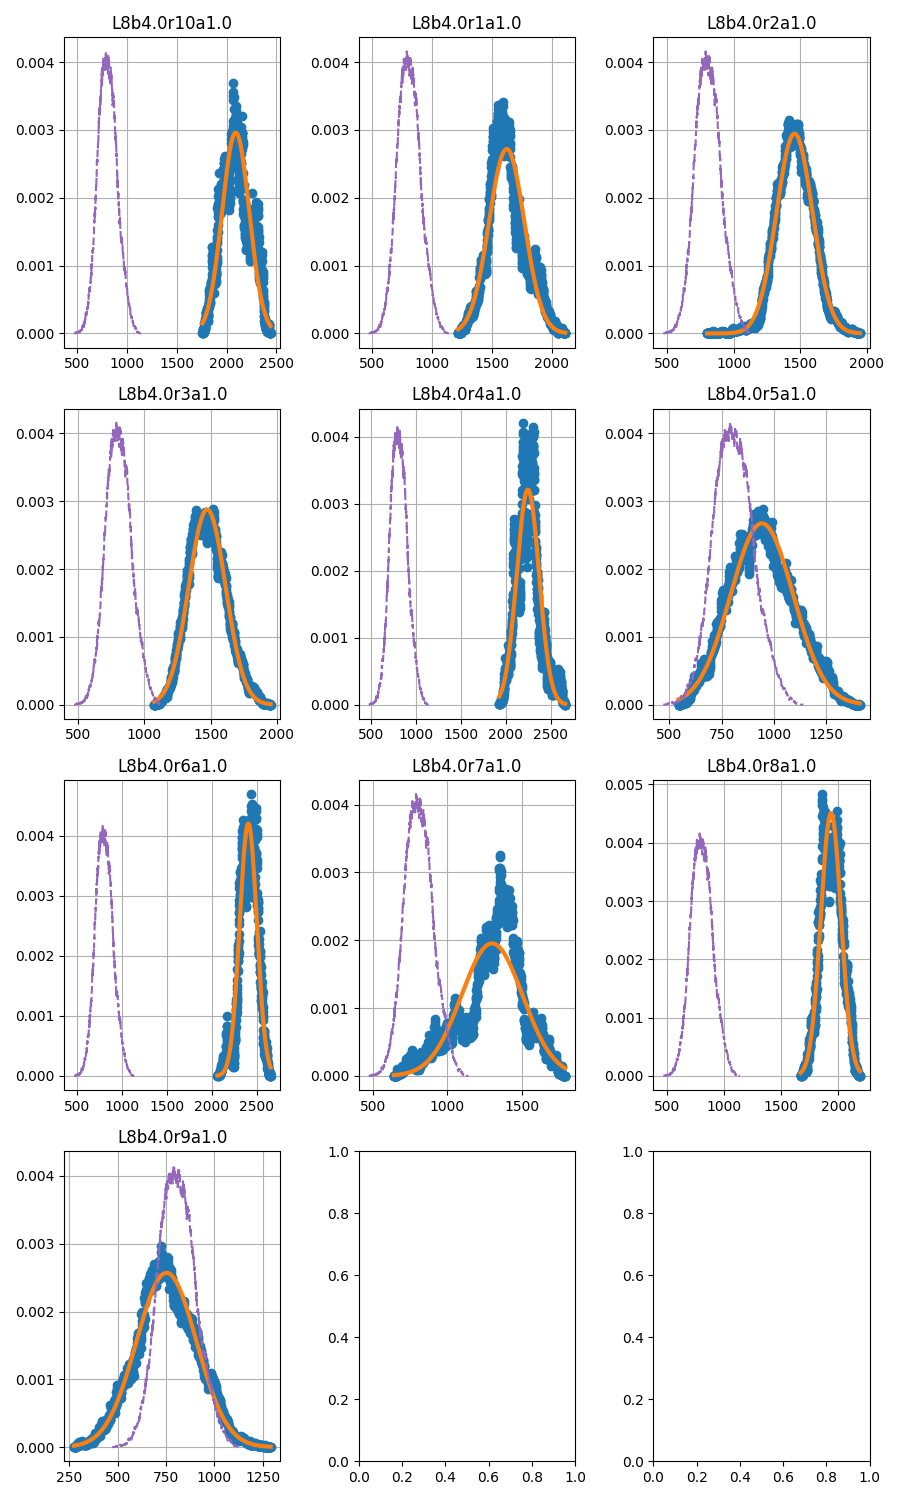

In [37]:
fnames = !ls ../runs/amp_1.0/L8/nmnm_L8b4.0*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.0_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta=4.5$

['../runs/amp_1.0/L8/res_L8b4.5r5a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r2a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r6a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r7a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r8a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r3a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r1a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r9a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r4a1.0.dat', '../runs/amp_1.0/L8/res_L8b4.5r10a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           5  0.162855     0.001720            T  0.061009  0.002663   
1           2  0.244495     0.003668            T  0.125869  0.007877   
2           6  0.365601     0.001546            T  0.197840  0.030888   
3           7  0.192098     0.004408            F  0.068637  0.004304   
4           8  0.318031     0.006760            T  0.154080  0.014831   
5           3  0.256479     0.003114            T  0.153853  0.011046   
6           1  0.257896     0.002549            T  0.145247  0.014198   
7           9  0.138867     0.002810            T  0.039116  0.001219   
8           4  0.347082     0.002866            T  0.185934  0.024553   
9          10  0.338823     0.002681            T  0.222722  0.050419   

  conv_g_im     Z(mln)  
0         T  24.914486  
1         T   4.221138  
2         T   1.334571  
3         F  13.169942  
4         T   2.322597  
5         T   3.646874  
6         T   3.637656  
7         T  50.959473  
8         F   1.584841  
9         F   1.634164

0.13541806222937455 +/- 0.0068842825823096365


<IPython.core.display.Javascript object>


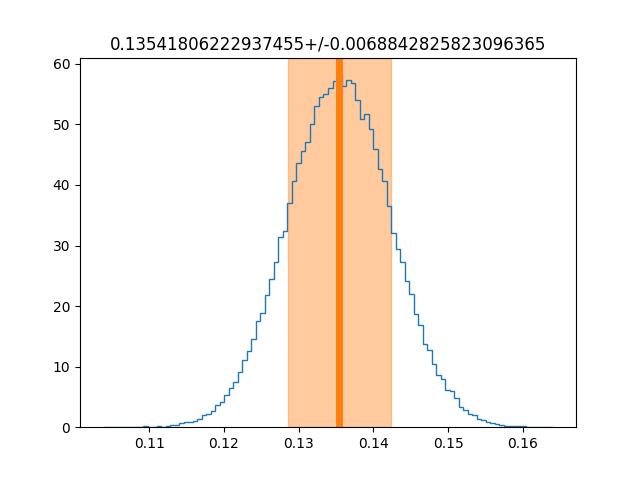

In [15]:
L, beta = 8, 4.5
dct_L8b45 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


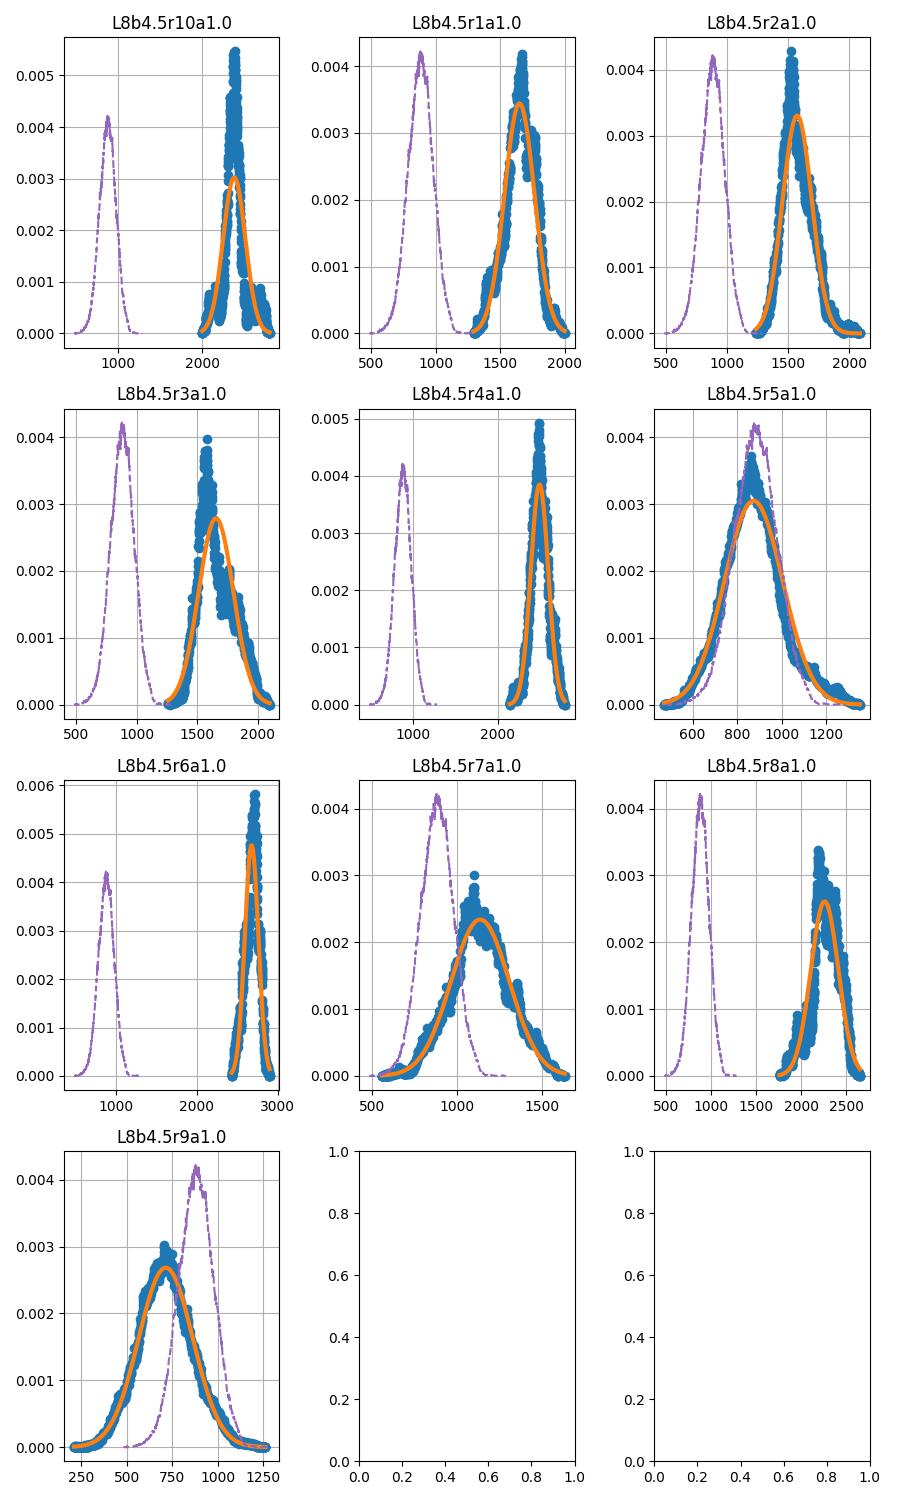

In [38]:
fnames = !ls ../runs/amp_1.0/L8/nmnm_L8b4.5*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=8$, $\beta=5.0$

['../runs/amp_1.0/L8/res_L8b5.0r10a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r3a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r9a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r4a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r1a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r6a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r5a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r7a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r8a1.0.dat', '../runs/amp_1.0/L8/res_L8b5.0r2a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0          10  0.340193     0.001825            T  0.251433  0.028100   
1           3  0.250386     0.002003            T  0.199945  0.009216   
2           9  0.120577     0.000805            T  0.049344  0.000702   
3           4  0.361456     0.002852            T  0.273709  0.040845   
4           1  0.250786     0.003464            T  0.242976  0.019129   
5           6  0.373855     0.006213            F  0.271480  0.032214   
6           5  0.154770     0.001127            T  0.099707  0.002035   
7           7  0.161092     0.003018            T  0.096246  0.002741   
8           8  0.332662     0.005733            T  0.222411  0.020269   
9           2  0.243976     0.003158            T  0.194451  0.021661   

  conv_g_im      Z(mln)  
0         T    2.206664  
1         T    5.136827  
2         T  192.713114  
3         T    1.798834  
4         T    2.050100  
5         T    1.658909  
6         T   63.051304  
7         T   39.576284  
8         T    2.525099  
9         T    2.440763

0.1901708313311781 +/- 0.00695675474090307


<IPython.core.display.Javascript object>


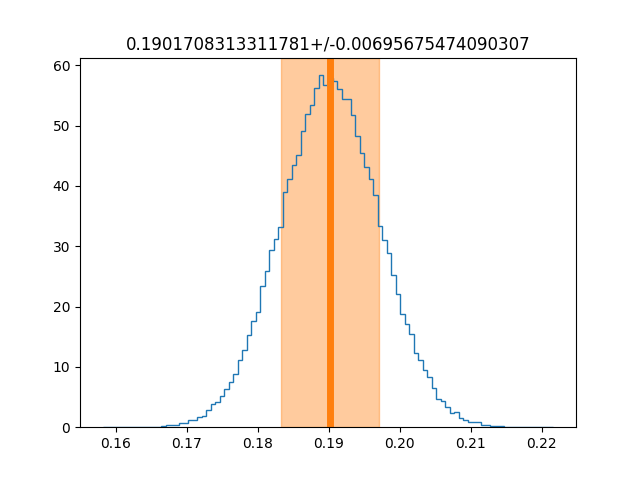

In [16]:
L, beta = 8, 5.0
dct_L8b50 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


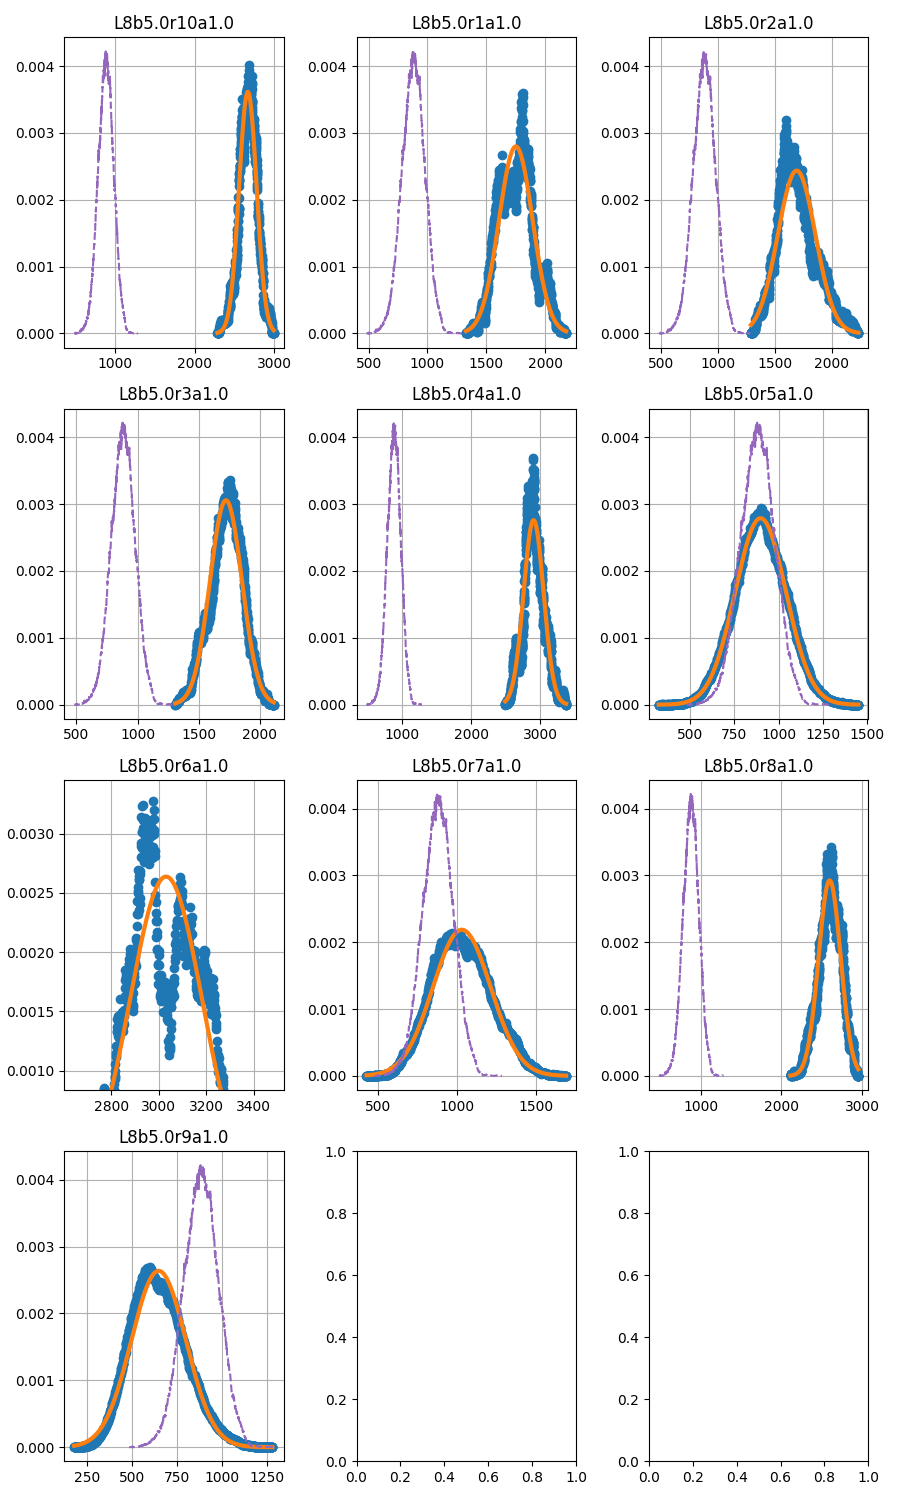

In [40]:
fnames = !ls ../runs/amp_1.0/L8/nmnm_L8b5.0*
fname_unif = '../repro_runs/m5.2L8/nmnm_m5.2L8b4.5_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=8 $

In [17]:
df = pd.DataFrame([dct_L8b40, dct_L8b45, dct_L8b50])
df

L  beta      g_im  err_g_im
0  8   4.0  0.064748  0.002757
1  8   4.5  0.135418  0.006884
2  8   5.0  0.190171  0.006957

In [18]:
# SAVE L=8
df.to_csv("m5.2amp1.0L8_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,8,4.0,0.06474847655892586,0.0027573846655268145
1,8,4.5,0.13541806222937455,0.0068842825823096365
2,8,5.0,0.1901708313311781,0.00695675474090307



## Read in $L=8$ 

In [19]:
df_L8 = pd.read_csv("m5.2amp1.0L8_av_replicas.dat")
df_L8

Unnamed: 0  L  beta      g_im  err_g_im
0           0  8   4.0  0.064748  0.002757
1           1  8   4.5  0.135418  0.006884
2           2  8   5.0  0.190171  0.006957

# Analyze $L=12$

### Analyze $L=12$, $\beta=4.2$

['../runs/amp_1.0/L12/res_L12b4.2r4a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r5a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r1a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r9a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r6a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r3a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r2a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r7a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r8a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.2r10a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           4  0.278346     0.008167            F  0.036779  0.006396   
1           5  0.225155     0.001185            T  0.019343  0.003061   
2           1  0.239410     0.006441            F  0.039726  0.005686   
3           9  0.183455     0.002037            T  0.015885  0.002322   
4           6  0.268181     0.005219            F  0.042087  0.013917   
5           3  0.242104     0.002986            F  0.046525  0.008504   
6           2  0.227833     0.004356            T  0.035277  0.005536   
7           7  0.186649     0.004463            F  0.020826  0.005325   
8           8  0.257327     0.001956            T  0.090153  0.017999   
9          10  0.252576     0.003905            F  0.088219  0.028898   

  conv_g_im    Z(mln)  
0         T  1.934952  
1         T  2.878574  
2         T  2.222843  
3         T  3.541687  
4         T  1.083897  
5         T  2.050237  
6         T  2.912609  
7         F  5.460754  
8         T  0.854445  
9         T  0.546053

0.043482326380263 +/- 0.003955024773138614


<IPython.core.display.Javascript object>


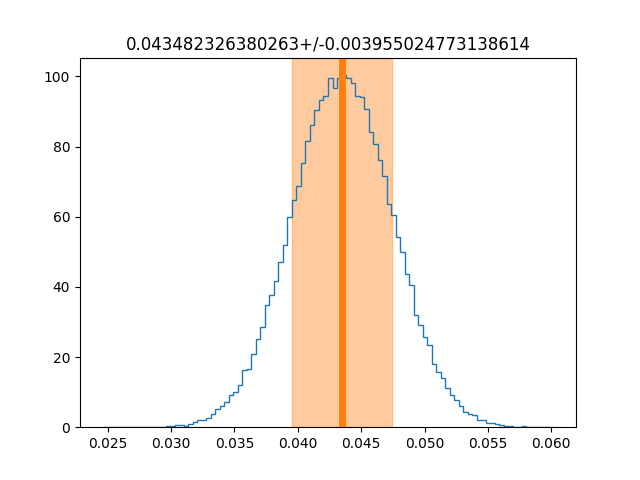

In [20]:
L, beta = 12, 4.2
dct_L12b42 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


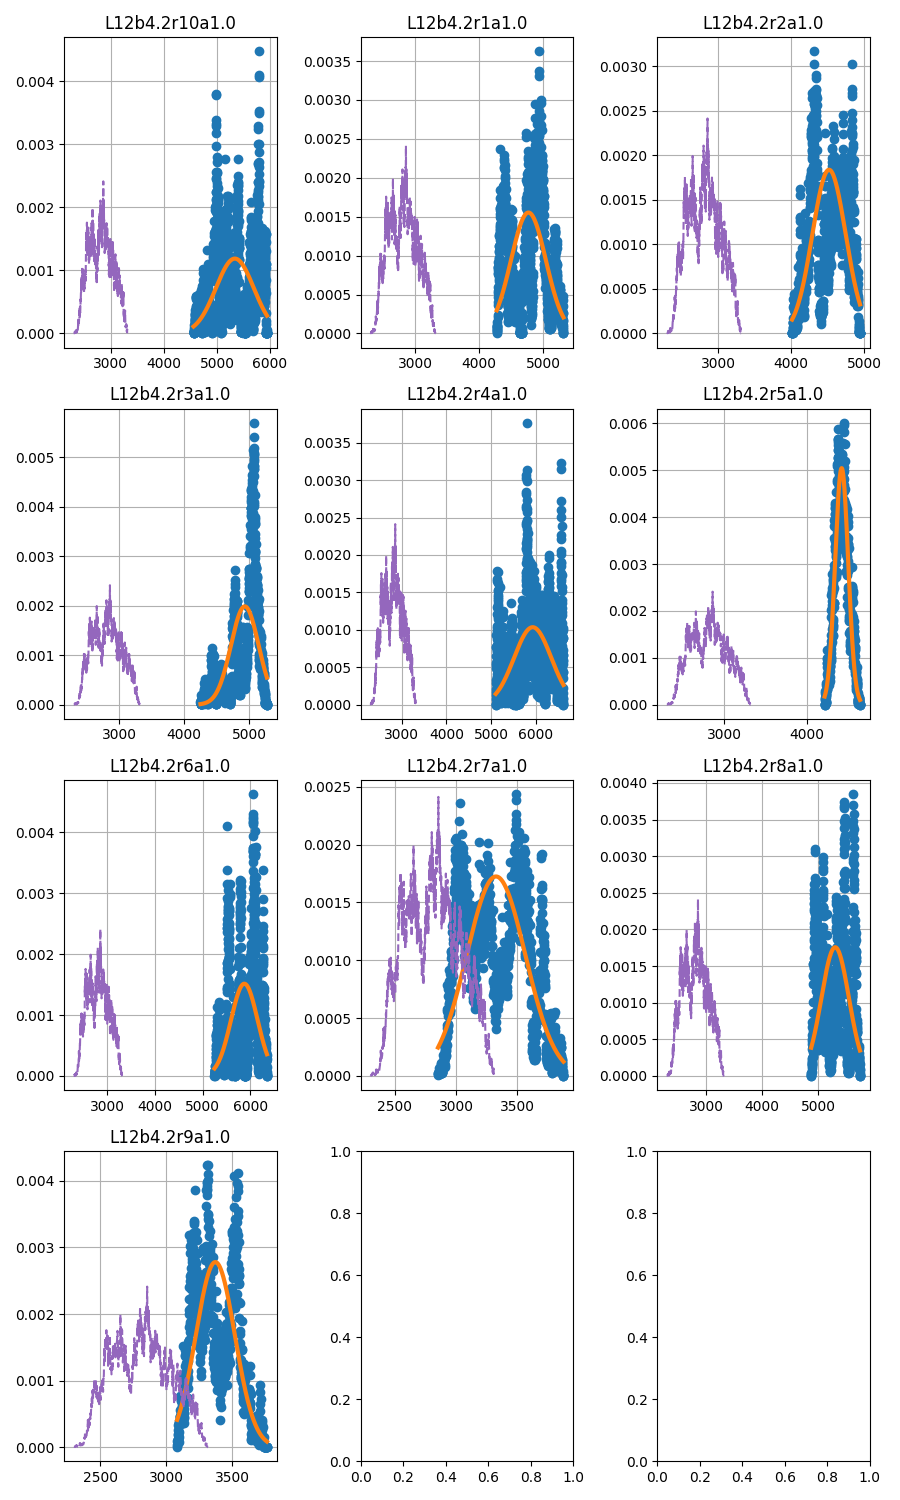

In [41]:
fnames = !ls ../runs/amp_1.0/L12/nmnm_L12b4.2*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.2_1.dat'
plot_nmnm(fnames, fname_unif)

### Analyze $L=12$, $\beta=4.55$

['../runs/amp_1.0/L12/res_L12b4.55r5a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r1a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r6a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r10a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r4a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r9a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r2a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r7a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r8a1.0.dat', '../runs/amp_1.0/L12/res_L12b4.55r3a1.0.dat']


replica_id   density  err_density conv_density      g_im  err_g_im  \
0           5  0.212649     0.001632            T  0.059536  0.015440   
1           1  0.238123     0.002933            T  0.055311  0.014416   
2           6  0.278595     0.004436            T  0.187017  0.039724   
3          10  0.261003     0.002074            F  0.258119  0.108148   
4           4  0.280455     0.002921            F  0.266761  0.078316   
5           9  0.173002     0.007901            F  0.027464  0.004684   
6           2  0.225338     0.002430            F  0.065585  0.030850   
7           7  0.206586     0.000977            T  0.024289  0.003612   
8           8  0.258661     0.002567            T  0.160697  0.049424   
9           3  0.242826     0.003655            F  0.169392  0.058005   

  conv_g_im    Z(mln)  
0         T  0.930487  
1         T  0.714765  
2         T  0.187832  
3         F  0.165712  
4         F  0.134681  
5         T  2.389047  
6         F  0.634325  
7         T  1.610648  
8         T  0.229668  
9         F  0.286445

0.12740862928055985 +/- 0.01629576762727197


<IPython.core.display.Javascript object>


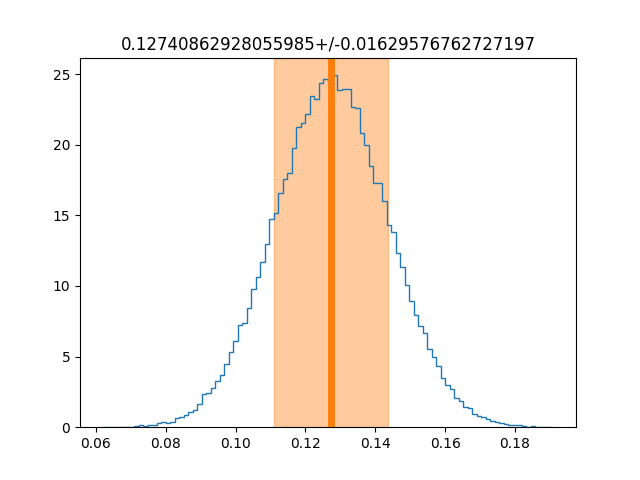

In [21]:
L, beta = 12, 4.55
dct_L12b455 = resample_g_im(L=L, beta=beta,
        reslines=glob.glob(f"../runs/amp_1.0/L{L}/res_L{L}b{beta}*.dat"),
        show=True)

<IPython.core.display.Javascript object>


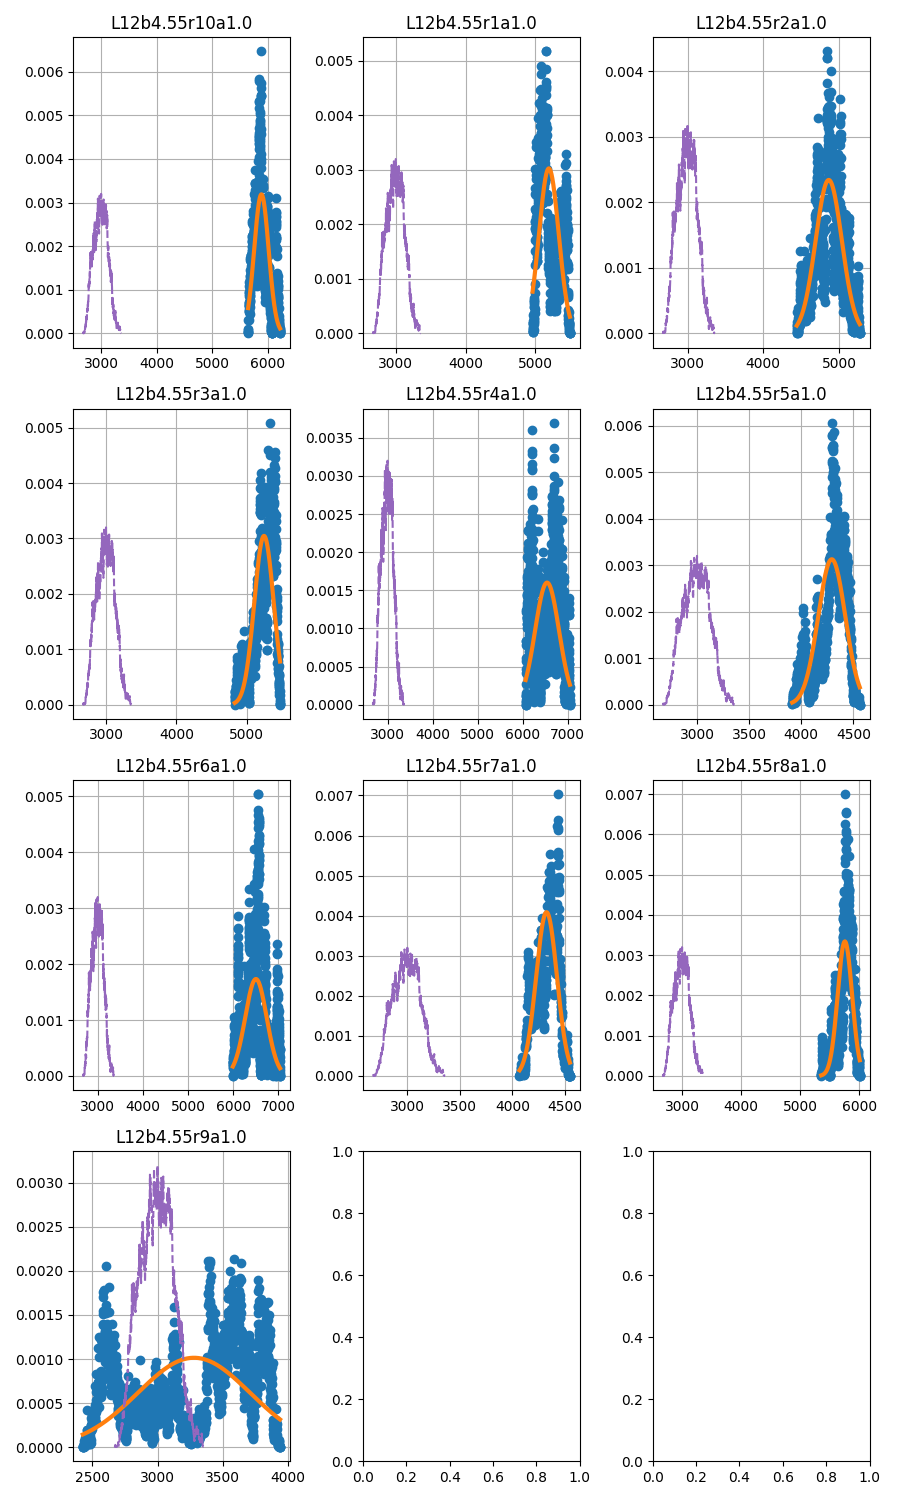

In [42]:
fnames = !ls ../runs/amp_1.0/L12/nmnm_L12b4.55*
fname_unif = '../repro_runs/m5.2L12/nmnm_m5.2L12b4.55_1.dat'
plot_nmnm(fnames, fname_unif)

## collect $L=12 $

In [23]:
df = pd.DataFrame([dct_L12b42, dct_L12b455])
df

L  beta      g_im  err_g_im
0  12  4.20  0.043482  0.003955
1  12  4.55  0.127409  0.016296

In [24]:
# SAVE L=12
df.to_csv("m5.2amp1.0L12_av_replicas.dat")
print(df.to_csv())

,L,beta,g_im,err_g_im
0,12,4.2,0.043482326380263,0.003955024773138614
1,12,4.55,0.12740862928055985,0.01629576762727197



## Read in $L=12$ 

In [25]:
df_L12 = pd.read_csv("m5.2amp1.0L12_av_replicas.dat")
df_L12

Unnamed: 0   L  beta      g_im  err_g_im
0           0  12  4.20  0.043482  0.003955
1           1  12  4.55  0.127409  0.016296

# Read in and cross for Tc

In [26]:
df_L6 = pd.read_csv("m5.2amp1.0L6_av_replicas.dat")
df_L8 = pd.read_csv("m5.2amp1.0L8_av_replicas.dat")
df_L12 = pd.read_csv("m5.2amp1.0L12_av_replicas.dat")
df_L6L8L12 = pd.concat([df_L6, df_L8, df_L12])
df_L6L8L12

Unnamed: 0   L  beta      g_im  err_g_im
0           0   6  4.00  0.098155  0.001173
1           1   6  4.50  0.137508  0.002038
2           2   6  5.00  0.168855  0.002105
0           0   8  4.00  0.064748  0.002757
1           1   8  4.50  0.135418  0.006884
2           2   8  5.00  0.190171  0.006957
0           0  12  4.20  0.043482  0.003955
1           1  12  4.55  0.127409  0.016296

<IPython.core.display.Javascript object>


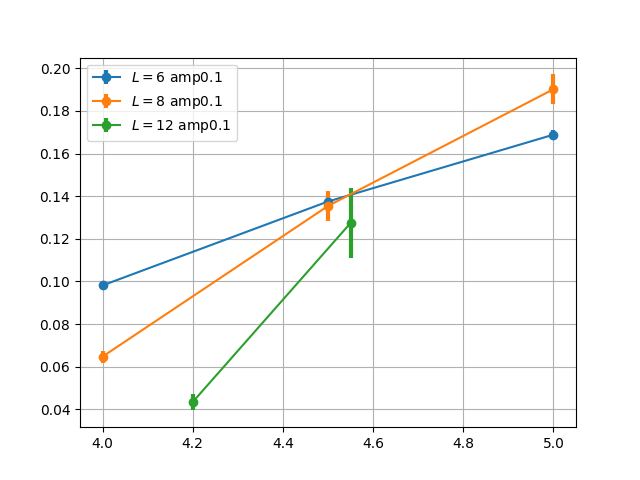

In [27]:
fig, ax = plt.subplots(1, 1)
    
for L, grp in df_L6L8L12.groupby("L"):
    ax.errorbar(grp["beta"], grp["g_im"], yerr=grp["err_g_im"],
                fmt='o-', elinewidth=3, label=r"$L=%s$ amp0.1" % L)

ax.legend(loc='best')
plt.grid(True)
plt.show()